In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
transform = transforms.ToTensor()
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20389345.86it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 4118300.60it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9572313.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3193182.83it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Define the Convolutional Autoencoder model
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # [16, 14, 14]
            nn.ReLU(True),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # [32, 7, 7]
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=7)  # [64, 1, 1]
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # [32, 7, 7]
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # [16, 14, 14]
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # [1, 28, 28]
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
# Instantiate the model, define the loss function and the optimizer
model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 20
for epoch in range(num_epochs):
    for data in trainloader:
        inputs, _ = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0099
Epoch [2/20], Loss: 0.0054
Epoch [3/20], Loss: 0.0042
Epoch [4/20], Loss: 0.0026
Epoch [5/20], Loss: 0.0038
Epoch [6/20], Loss: 0.0029
Epoch [7/20], Loss: 0.0023
Epoch [8/20], Loss: 0.0025
Epoch [9/20], Loss: 0.0025
Epoch [10/20], Loss: 0.0024
Epoch [11/20], Loss: 0.0022
Epoch [12/20], Loss: 0.0024
Epoch [13/20], Loss: 0.0026
Epoch [14/20], Loss: 0.0021
Epoch [15/20], Loss: 0.0022
Epoch [16/20], Loss: 0.0023
Epoch [17/20], Loss: 0.0019
Epoch [18/20], Loss: 0.0018
Epoch [19/20], Loss: 0.0019
Epoch [20/20], Loss: 0.0019


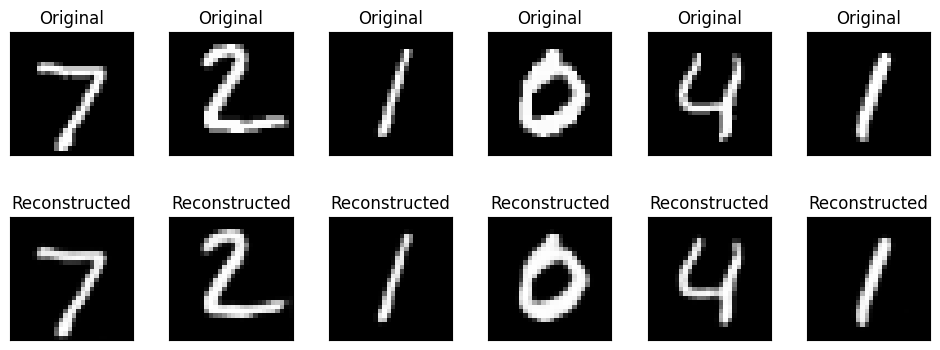

In [4]:
# Function to visualize some results
def visualize_reconstruction(model, data_loader):
    model.eval()
    with torch.no_grad():
        dataiter = iter(data_loader)
        images, _ = next(dataiter)  # Use next() to get the first batch of images and labels
        outputs = model(images)

        # Show original and reconstructed images
        plt.figure(figsize=(12, 4))
        for i in range(6):
            ax = plt.subplot(2, 6, i + 1)
            plt.imshow(images[i].view(28, 28).cpu().numpy(), cmap='gray')
            plt.title("Original")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        for i in range(6):
            ax = plt.subplot(2, 6, i + 7)
            plt.imshow(outputs[i].view(28, 28).cpu().numpy(), cmap='gray')
            plt.title("Reconstructed")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        plt.subplots_adjust(hspace=0.5)  # Adjust the height space between rows
        plt.show()

# Visualize some reconstructed images
visualize_reconstruction(model, testloader)